In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('archive/train.csv')

/var/folders/nv/6s4s5p915nsddv_m0lqn78hw0000gn/T/ipykernel_16409/1879883293.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('archive/train.csv')


In [3]:
flag = 'Credit_Score'

def flag_to_num(x):
    if x == 'Good' or x == 'Standard':
        return 0
    if x == 'Poor':
        return 1

data[flag] = data[flag].apply(flag_to_num)

In [4]:
from sklearn.model_selection import train_test_split


train, temp = train_test_split(data, test_size=0.3, stratify=data[flag], random_state=42)

test, val = train_test_split(temp, test_size=1/3, stratify=temp[flag], random_state=42)

In [5]:
train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
12094,0x5cdc,CUS_0x3562,July,Marce,34_,821-34-2286,Media_Manager,43436.27,NaN,0,...,Good,63.92,29.946936,17 Years and 5 Months,No,58.411588,87.44433220001284,High_spent_Large_value_payments,442.91299672547774,0
90066,0x225bc,CUS_0x5cb8,March,radk,34,445-76-5961,_______,15362.78_,1441.231667,9,...,_,3773.56,25.017261,NaN,Yes,45.754950,126.14020063907856,Low_spent_Small_value_payments,262.2280160743394,1
33414,0xd9c8,CUS_0x3bb8,July,Alister Bullt,35,855-98-5797,Doctor,41077.12,3390.093333,9,...,Bad,1507.89,23.445592,9 Years and 11 Months,Yes,199.584000,132.28124819516694,High_spent_Medium_value_payments,257.1440847655278,0
39850,0xff80,CUS_0x8247,March,Daye,16,597-93-5210,Scientist,9670.15,733.845833,8,...,Bad,3566.81,29.913943,4 Years and 4 Months,Yes,35.319743,__10000__,Low_spent_Small_value_payments,281.3827838276423,1
10765,0x5513,CUS_0x91f,June,Thomas Ferrarot,44,740-45-3202,Doctor,21450.72,1713.560000,2,...,Good,123.12,33.175057,33 Years and 3 Months,No,31.296901,NaN,High_spent_Large_value_payments,337.1057430916695,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91669,0x22f1f,CUS_0xb615,June,Emilyh,24,744-77-7523,Teacher,21206.48,1631.206667,7,...,_,231.87,24.408654,19 Years and 1 Months,No,0.000000,94.48062734383845,High_spent_Small_value_payments,328.64003932282816,0
83626,0x20000,CUS_0x649e,March,Frank Jackj,23,815-38-6088,Musician,69324.4,5509.033333,828,...,Standard,1075.73,23.769435,17 Years and 3 Months,Yes,115.008706,609.1796819297018,Low_spent_Small_value_payments,116.71494514955087,0
79873,0x1ea03,CUS_0x8099,February,ram,51,767-19-9517,Writer,112400.24,9657.686667,7,...,_,57.91,38.650498,32 Years and 2 Months,Yes,203.517564,248.30094005161249,High_spent_Medium_value_payments,763.9501630936113,0
34860,0xe242,CUS_0xc283,May,Viswanathaz,43,768-07-9404,Manager,16012.64,NaN,8,...,Bad,1527.67,32.921174,17 Years and 6 Months,Yes,31.332122,50.71516084133082,Low_spent_Small_value_payments,318.7913837789545,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 12094 to 27575
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        70000 non-null  object 
 1   Customer_ID               70000 non-null  object 
 2   Month                     70000 non-null  object 
 3   Name                      63051 non-null  object 
 4   Age                       70000 non-null  object 
 5   SSN                       70000 non-null  object 
 6   Occupation                70000 non-null  object 
 7   Annual_Income             70000 non-null  object 
 8   Monthly_Inhand_Salary     59571 non-null  float64
 9   Num_Bank_Accounts         70000 non-null  int64  
 10  Num_Credit_Card           70000 non-null  int64  
 11  Interest_Rate             70000 non-null  int64  
 12  Num_of_Loan               70000 non-null  object 
 13  Type_of_Loan              61981 non-null  object 
 14  Delay_f

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.drop(self.columns, axis=1)

class DTypeCorrection(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_transformed = X.copy()
        for col in self.columns:
            X_transformed[col] = X_transformed[col].apply(lambda x: float(str(x).replace('_', '')) if x != '_' else  0)
            X_transformed[col] = X_transformed[col].astype('float')

        return X_transformed



class FillNA(BaseEstimator, TransformerMixin):
    def __init__(self, fill_values):
        self.fill_values = fill_values

    def fit(self, X, y=None):
        for k, v in self.fill_values.items():
            if v == "median":
                median = X[k].median()
                self.fill_values[k] = median

            if v == "mean":
                mean = X[k].mean()
                self.fill_values[k] = mean

            if v == "mode":
                mode = X[k].mode()[0]
                self.fill_values[k] = mode
        return self

    def transform(self, X, y=None):
        X_transformed = X.copy()
        for k, v in self.fill_values.items():
            X_transformed[k].fillna(v, inplace=True)

        return X_transformed

class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.type_of_loans = []
        for vals in X['Type_of_Loan'].tolist():
            vals = vals.replace('and ', '')
            for loans in vals.split(', '):
                if loans not in self.type_of_loans:
                    self.type_of_loans.append(loans)

        return self

    def transform(self, X, y=None):
        X_transformed = X.copy()
        for val in self.type_of_loans:
            X_transformed[val] = X_transformed['Type_of_Loan'].apply(lambda x: 1 if val in x else 0)

        X_transformed['Credit_History_Years'] = X_transformed['Credit_History_Age'].apply(lambda x: 0 if x == '0' else float(x.split(' Years')[0]))
        X_transformed['Credit_History_Months'] = X_transformed['Credit_History_Age'].apply(lambda x: 0 if x == '0' else float(x.split(' and ')[1].split(' Months')[0]))

        return X_transformed.drop(['Credit_History_Age', 'Type_of_Loan'], axis=1)

class Scaler_Encoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        numeric_columns = X.select_dtypes(include=[np.number]).columns
        categorical_columns = X.select_dtypes(exclude=[np.number]).columns

        scaler = StandardScaler()
        ohe = OneHotEncoder(drop='first', handle_unknown='ignore')

        self.transformer = ColumnTransformer([
            ('numeric', scaler, numeric_columns),
            ('categorical', ohe, categorical_columns)
        ])
        self.transformer.fit(X)
        return self

    def transform(self, X, y=None):
        import pandas as pd
        X_transformed = self.transformer.transform(X)
        features_name = self.transformer.get_feature_names_out()
        X_transformed = pd.DataFrame(X_transformed, columns=features_name)
        return X_transformed

import numpy as np

class MulticollinearityReducer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.65):
        self.threshold = threshold
        self.features_to_drop = []

    def fit(self, X, y=None):
        X_temp = X.copy()
        while True:
            corr_matrix = X_temp.corr().abs()

            upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

            max_corr = upper_triangle.max().max()

            if max_corr <= self.threshold:
                break


            to_drop = upper_triangle.stack().idxmax()
            feature_to_drop = to_drop[1]
            self.features_to_drop.append(feature_to_drop)

            X_temp = X_temp.drop(columns=[feature_to_drop])

        self.feature_names_out_ = X_temp.columns
        return self

    def transform(self, X, y=None):
        return X.drop(self.features_to_drop, axis=1)

    def get_feature_names_out(self):
        return self.feature_names_out_


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 12094 to 27575
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        70000 non-null  object 
 1   Customer_ID               70000 non-null  object 
 2   Month                     70000 non-null  object 
 3   Name                      63051 non-null  object 
 4   Age                       70000 non-null  object 
 5   SSN                       70000 non-null  object 
 6   Occupation                70000 non-null  object 
 7   Annual_Income             70000 non-null  object 
 8   Monthly_Inhand_Salary     59571 non-null  float64
 9   Num_Bank_Accounts         70000 non-null  int64  
 10  Num_Credit_Card           70000 non-null  int64  
 11  Interest_Rate             70000 non-null  int64  
 12  Num_of_Loan               70000 non-null  object 
 13  Type_of_Loan              61981 non-null  object 
 14  Delay_f

In [9]:
pipeline = Pipeline([
    ('Drop_Columns', ColumnDropper(columns = ['ID', 'Customer_ID', 'Name', 'SSN'])),

    ('DType_Correction', DTypeCorrection(columns=['Num_of_Loan', 'Age', 'Annual_Income', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance'])),

    ('Fill_NA', FillNA(fill_values = {'Monthly_Inhand_Salary': 'mean', 'Type_of_Loan': 'Not Specified', 'Num_of_Delayed_Payment': 'median', 'Num_Credit_Inquiries': 'median', 'Credit_History_Age': '0', 'Amount_invested_monthly': 'mean'})),

    ('Feature_Engineer', FeatureEngineer()),

    ('Scaler_Encoder', Scaler_Encoder()),
   ('Multicollinearity_reducer', MulticollinearityReducer())


])

In [10]:
X_train, X_test, X_val, y_train, y_test, y_val = train.drop(flag, axis=1), test.drop(flag, axis=1), val.drop([flag], axis=1), train[flag], test[flag], val[flag]

In [11]:
pipeline.fit(X_train)

/var/folders/nv/6s4s5p915nsddv_m0lqn78hw0000gn/T/ipykernel_16409/2995802662.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_transformed[k].fillna(v, inplace=True)


Pipeline(steps=[('Drop_Columns',
                 ColumnDropper(columns=['ID', 'Customer_ID', 'Name', 'SSN'])),
                ('DType_Correction',
                 DTypeCorrection(columns=['Num_of_Loan', 'Age', 'Annual_Income',
                                          'Num_of_Delayed_Payment',
                                          'Changed_Credit_Limit',
                                          'Outstanding_Debt',
                                          'Amount_invested_monthly',
                                          'Monthly_Balance'])),
                ('Fill_NA',
                 FillNA(fill_values={'Amount_invested_monthly': 637.2277950035283,
                                     'Credit_History_Age': '0',
                                     'Monthly_Inhand_Salary': 4202.696985969621,
                                     'Num_Credit_Inquiries': 6.0,
                                     'Num_of_Delayed_Payment': 14.0,
                                     'Type_of_Loan': 'Not Specified'})),
                ('Feature_Engineer', FeatureEngineer()),
                ('Scaler_Encoder', Scaler_Encoder()),
                ('Multicollinearity_reducer', MulticollinearityReducer())])

In [12]:
pipeline['Feature_Engineer'].type_of_loans

['Not Specified',
 'Mortgage Loan',
 'Debt Consolidation Loan',
 'Student Loan',
 'Auto Loan',
 'Credit-Builder Loan',
 'Payday Loan',
 'Personal Loan',
 'Home Equity Loan']

In [13]:
import warnings

warnings.filterwarnings('ignore')

X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)
X_val_transformed = pipeline.transform(X_val)

In [14]:
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 59 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   numeric__Age                                                     70000 non-null  float64
 1   numeric__Annual_Income                                           70000 non-null  float64
 2   numeric__Monthly_Inhand_Salary                                   70000 non-null  float64
 3   numeric__Num_Bank_Accounts                                       70000 non-null  float64
 4   numeric__Num_Credit_Card                                         70000 non-null  float64
 5   numeric__Interest_Rate                                           70000 non-null  float64
 6   numeric__Num_of_Loan                                             70000 non-null  float64
 7   numeric__Delay_from_due_date            

In [15]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import get_scorer

scorer = get_scorer('roc_auc')

model = LGBMClassifier(random_state=42)

model.fit(X_train_transformed, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 20299, number of negative: 49701
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3711
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289986 -> initscore=-0.895453
[LightGBM] [Info] Start training from score -0.895453


LGBMClassifier(random_state=42)

In [16]:
score_train = scorer(model, X_train_transformed, y_train)

score_test = scorer(model, X_test_transformed, y_test)

score_val = scorer(model, X_val_transformed, y_val)

print("Train AUC: ", score_train)
print("Test AUC: ", score_test)
print("Validation AUC: ", score_val)

Train AUC:  0.9161654971025962
Test AUC:  0.8910232878416847
Validation AUC:  0.8934637445361826


In [17]:
train_probas = model.predict_proba(X_train_transformed)[:, 1]  # Predicted probabilities for the positive class
test_probas = model.predict_proba(X_test_transformed)[:, 1]
valid_probas = model.predict_proba(X_val_transformed)[:, 1]

train_df = pd.DataFrame({"probas": train_probas, "flags": y_train})
test_df = pd.DataFrame({"probas": test_probas, "flags": y_test})
valid_df = pd.DataFrame({"probas": valid_probas, "flags": y_val})

print("Train DataFrame:")
print(train_df.head())
print("\nTest DataFrame:")
print(test_df.head())
print("\nValidation DataFrame:")
print(valid_df.head())


Train DataFrame:
         probas  flags
12094  0.001471      0
90066  0.504450      1
33414  0.735716      0
39850  0.793190      1
10765  0.116920      0

Test DataFrame:
         probas  flags
67268  0.120946      0
61108  0.137199      0
37422  0.062197      0
77487  0.112428      1
95060  0.181236      1

Validation DataFrame:
         probas  flags
86882  0.020385      0
49697  0.016544      0
38378  0.349392      0
95450  0.443810      0
83157  0.277326      1


In [18]:
# Step 3: Create bins for train data and save bin intervals
num_bins = 6
train_df["bins"], bin_edges = pd.qcut(train_df["probas"], q=num_bins, retbins=True, labels=False)

# Save bin intervals
bin_intervals = {f"Grade {i+1}": (bin_edges[i], bin_edges[i+1]) for i in range(len(bin_edges) - 1)}
print("\nSaved Bin Intervals:")
print(bin_intervals)

# Step 4: Assign bins to test and validation based on train bin edges
test_df["bins"] = pd.cut(test_df["probas"], bins=bin_edges, labels=False, include_lowest=True)
valid_df["bins"] = pd.cut(valid_df["probas"], bins=bin_edges, labels=False, include_lowest=True)

# Step 5: Add bin classification based on bin number (higher bin = worse)
def classify_bins(df):
    """ Add a classification column where greater bins mean worse categories """
    classification_map = {
        0: "Excellent",
        1: "Good",
        2: "Average",
        3: "Below Average",
        4: "Poor",
        5: "Very Poor"
    }
    df["bin_category"] = df["bins"].map(classification_map)
    return df

# Apply classification to train, test, and validation
train_df = classify_bins(train_df)
test_df = classify_bins(test_df)
valid_df = classify_bins(valid_df)

# Step 6: Calculate positive proportions and counts
def calculate_bin_metrics(df):
    """ Calculate positive proportions and counts for each bin """
    metrics = df.groupby(["bins", "bin_category"])["flags"].agg(["mean", "sum", "count"]).reset_index()
    metrics["negatives"] = metrics["count"] - metrics["sum"]
    metrics["positives"] = metrics["sum"]
    return metrics

train_metrics = calculate_bin_metrics(train_df)
test_metrics = calculate_bin_metrics(test_df)
valid_metrics = calculate_bin_metrics(valid_df)

# Step 7: Display results
print("\nTrain Metrics with Bin Categories:")
print(train_metrics)

print("\nTest Metrics with Bin Categories:")
print(test_metrics)

print("\nValidation Metrics with Bin Categories:")
print(valid_metrics)



Saved Bin Intervals:
{'Grade 1': (0.0008504728166055684, 0.04847368621162854), 'Grade 2': (0.04847368621162854, 0.08484103979920649), 'Grade 3': (0.08484103979920649, 0.14131527318942577), 'Grade 4': (0.14131527318942577, 0.3632377098401469), 'Grade 5': (0.3632377098401469, 0.7230627301613588), 'Grade 6': (0.7230627301613588, 0.9339649653970055)}

Train Metrics with Bin Categories:
   bins   bin_category      mean   sum  count  negatives  positives
0     0      Excellent  0.000771     9  11667      11658          9
1     1           Good  0.019115   223  11666      11443        223
2     2        Average  0.064198   749  11667      10918        749
3     3  Below Average  0.250214  2919  11666       8747       2919
4     4           Poor  0.565907  6603  11668       5065       6603
5     5      Very Poor  0.839705  9796  11666       1870       9796

Test Metrics with Bin Categories:
   bins   bin_category      mean   sum  count  negatives  positives
0   0.0      Excellent  0.002405   

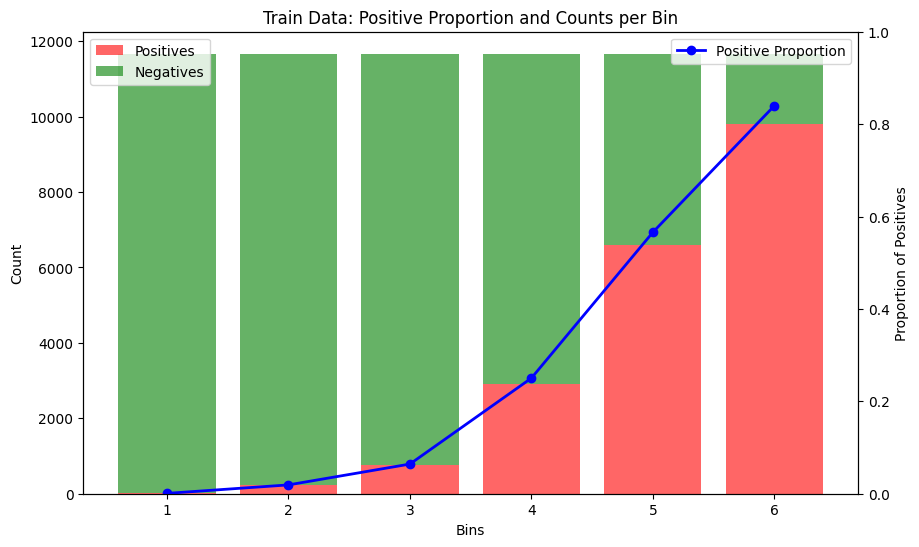

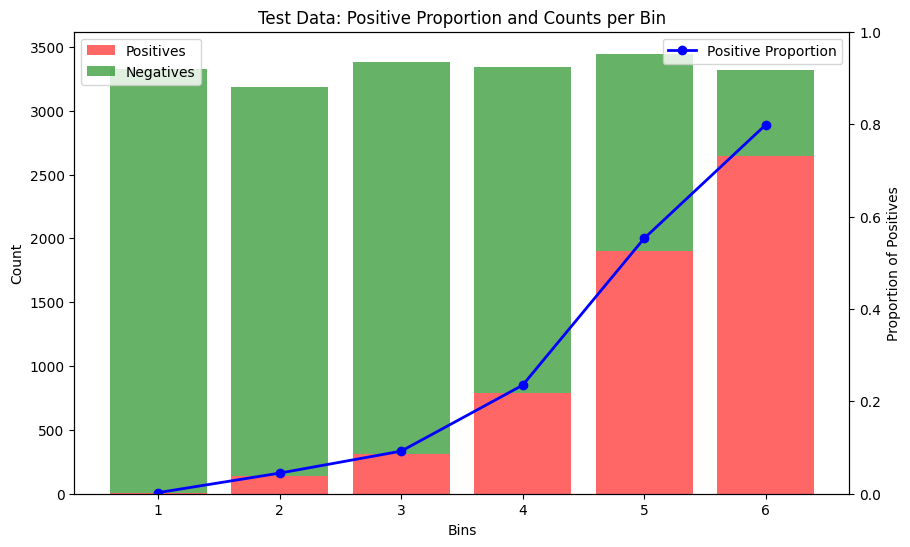

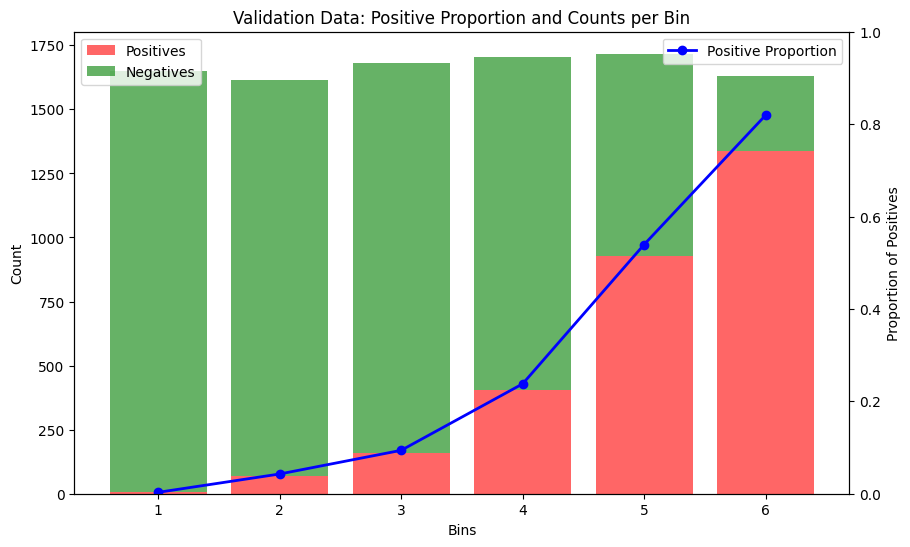

In [19]:
import matplotlib.pyplot as plt
# Step 6: Plot the results
def plot_metrics(metrics, title):
    """ Plot positive proportions and counts for each bin """
    bins = range(1, len(metrics) + 1)
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Bar plot for positive and negative counts
    ax1.bar(bins, metrics["positives"], color='red', label="Positives", alpha=0.6)
    ax1.bar(bins, metrics["negatives"], bottom=metrics["positives"], color='green', label="Negatives", alpha=0.6)
    ax1.set_ylabel("Count")
    ax1.set_xlabel("Bins")
    ax1.set_title(title)
    ax1.legend(loc="upper left")

    # Line plot for positive proportions
    ax2 = ax1.twinx()
    ax2.plot(bins, metrics["mean"], color='blue', marker='o', linestyle='-', linewidth=2, label="Positive Proportion")
    ax2.set_ylabel("Proportion of Positives")
    ax2.set_ylim(0, 1)
    ax2.legend(loc="upper right")

    plt.show()

# Plot for train, test, and validation
plot_metrics(train_metrics, "Train Data: Positive Proportion and Counts per Bin")
plot_metrics(test_metrics, "Test Data: Positive Proportion and Counts per Bin")
plot_metrics(valid_metrics, "Validation Data: Positive Proportion and Counts per Bin")

In [20]:
import json

with open("bin_intervals.json", "w") as f:
    json.dump(bin_intervals, f, indent=4)

In [21]:
X_train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
12094,0x5cdc,CUS_0x3562,July,Marce,34_,821-34-2286,Media_Manager,43436.27,NaN,0,...,4.0,Good,63.92,29.946936,17 Years and 5 Months,No,58.411588,87.44433220001284,High_spent_Large_value_payments,442.91299672547774
90066,0x225bc,CUS_0x5cb8,March,radk,34,445-76-5961,_______,15362.78_,1441.231667,9,...,7.0,_,3773.56,25.017261,NaN,Yes,45.754950,126.14020063907856,Low_spent_Small_value_payments,262.2280160743394
33414,0xd9c8,CUS_0x3bb8,July,Alister Bullt,35,855-98-5797,Doctor,41077.12,3390.093333,9,...,12.0,Bad,1507.89,23.445592,9 Years and 11 Months,Yes,199.584000,132.28124819516694,High_spent_Medium_value_payments,257.1440847655278
39850,0xff80,CUS_0x8247,March,Daye,16,597-93-5210,Scientist,9670.15,733.845833,8,...,7.0,Bad,3566.81,29.913943,4 Years and 4 Months,Yes,35.319743,__10000__,Low_spent_Small_value_payments,281.3827838276423
10765,0x5513,CUS_0x91f,June,Thomas Ferrarot,44,740-45-3202,Doctor,21450.72,1713.560000,2,...,1.0,Good,123.12,33.175057,33 Years and 3 Months,No,31.296901,NaN,High_spent_Large_value_payments,337.1057430916695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91669,0x22f1f,CUS_0xb615,June,Emilyh,24,744-77-7523,Teacher,21206.48,1631.206667,7,...,2.0,_,231.87,24.408654,19 Years and 1 Months,No,0.000000,94.48062734383845,High_spent_Small_value_payments,328.64003932282816
83626,0x20000,CUS_0x649e,March,Frank Jackj,23,815-38-6088,Musician,69324.4,5509.033333,828,...,7.0,Standard,1075.73,23.769435,17 Years and 3 Months,Yes,115.008706,609.1796819297018,Low_spent_Small_value_payments,116.71494514955087
79873,0x1ea03,CUS_0x8099,February,ram,51,767-19-9517,Writer,112400.24,9657.686667,7,...,4.0,_,57.91,38.650498,32 Years and 2 Months,Yes,203.517564,248.30094005161249,High_spent_Medium_value_payments,763.9501630936113
34860,0xe242,CUS_0xc283,May,Viswanathaz,43,768-07-9404,Manager,16012.64,NaN,8,...,11.0,Bad,1527.67,32.921174,17 Years and 6 Months,Yes,31.332122,50.71516084133082,Low_spent_Small_value_payments,318.7913837789545


In [22]:
model_pipeline = Pipeline(steps = pipeline.steps + [
    ('model', model)
])

model_pipeline.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 20299, number of negative: 49701
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3711
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289986 -> initscore=-0.895453
[LightGBM] [Info] Start training from score -0.895453


Pipeline(steps=[('Drop_Columns',
                 ColumnDropper(columns=['ID', 'Customer_ID', 'Name', 'SSN'])),
                ('DType_Correction',
                 DTypeCorrection(columns=['Num_of_Loan', 'Age', 'Annual_Income',
                                          'Num_of_Delayed_Payment',
                                          'Changed_Credit_Limit',
                                          'Outstanding_Debt',
                                          'Amount_invested_monthly',
                                          'Monthly_Balance'])),
                ('Fill_NA',
                 FillNA(fill_values={'Amount_invested_monthly': 637.2277950035283,
                                     'Credit_History_Age': '0',
                                     'Monthly_Inhand_Salary': 4202.696985969621,
                                     'Num_Credit_Inquiries': 6.0,
                                     'Num_of_Delayed_Payment': 14.0,
                                     'Type_of_Loan': 'Not Specified'})),
                ('Feature_Engineer', FeatureEngineer()),
                ('Scaler_Encoder', Scaler_Encoder()),
                ('Multicollinearity_reducer', MulticollinearityReducer()),
                ('model', LGBMClassifier(random_state=42))])

In [23]:
import dill

with open("model.pkl", "wb") as f:
    dill.dump(model_pipeline, f)

In [19]:
import mlflow
experiment_name = "ML Project"

mlflow.set_tracking_uri("http://localhost:8000")

try:
    experiment_id = mlflow.create_experiment(experiment_name)
    print(f"Experiment '{experiment_name}' created with ID: {experiment_id}")
except mlflow.exceptions.MlflowException:
    experiment = mlflow.get_experiment_by_name(experiment_name)
    experiment_id = experiment.experiment_id
    print(f"Experiment '{experiment_name}' already exists with ID: {experiment_id}")

Experiment 'ML Project' already exists with ID: 1


In [20]:
with mlflow.start_run(experiment_id=experiment_id, run_name=f'model_pipeline_{score_test}') as run:
    mlflow.log_metric("AUC_train", score_train)
    mlflow.log_metric("AUC_test", score_test)
    mlflow.log_metric("AUC_val", score_val)
    mlflow.sklearn.log_model(model_pipeline, "model")

2024/12/15 15:01:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run model_pipeline_0.8910232878416847 at: http://localhost:8000/#/experiments/1/runs/6a5c21d2661d4716be073cf84f973056
🧪 View experiment at: http://localhost:8000/#/experiments/1
